<h1 align="center"> Principal Component Analysis </h1>
<h3 align="center"> IST 5520, Fall 2022 </h3>
<h4 align="center"> By: Langtao Chen </h4>
<h4 align="center"> Update: 10/12/2022 </h4>

In [1]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

## 1. Data

In this section, we use the cereal dataset at http://lib.stat.cmu.edu/DASL/Datafiles/Cereals.html

The dataset contain 77 cereals.

Variable Names:

- Name: Name of cereal
- mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina
- type: cold or hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals

In [2]:
df = pd.read_csv('../Data/Cereals.txt', sep='\t')
df.sample(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
35,Honey_Graham_Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292
71,Total_Whole_Grain,G,C,100,3,1,200,3.0,16.0,3,110,100,3,1.0,1.00,46.658844
26,Frosted_Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.0,0.80,58.345141
67,Special_K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324
17,Corn_Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791
50,Nutri-grain_Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.0,1.00,59.642837
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
25,Frosted_Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973
31,Golden_Grahams,G,C,110,1,1,280,0.0,15.0,9,45,25,2,1.0,0.75,23.804043
38,Just_Right_Crunchy__Nuggets,K,C,110,2,1,170,1.0,17.0,6,60,100,3,1.0,1.00,36.523683


In [3]:
df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


From the above correlation table, we can find that variables are correlated. For example, corr(calories, fat) = 0.4986.

## 2. Normalize Data

Only choose the numeric columns in the dataset to do the principal component analysis.

In [4]:
data_norm = scale(df.loc[:,'calories':'rating'])

In [5]:
type(data_norm)

numpy.ndarray

In [6]:
pd.DataFrame(data_norm).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,77.0,-8.398765e-17,1.006557,-2.938605,-0.355585,0.161019,0.161019,2.744040
1,77.0,2.018587e-17,1.006557,-1.420902,-0.501495,0.417912,0.417912,3.176134
2,77.0,8.583502e-17,1.006557,-1.013072,-1.013072,-0.012988,0.987096,3.987349
3,77.0,5.767392e-18,1.006557,-1.917189,-0.356306,0.244034,0.604238,1.924986
4,77.0,9.155735e-17,1.006557,-0.908824,-0.486498,-0.064172,0.358155,5.003745
5,77.0,2.883696e-18,1.006557,-3.669045,-0.610998,-0.140530,0.565173,1.976579
6,77.0,-1.658125e-17,1.006557,-1.793978,-0.888166,0.017646,0.923458,1.829269
7,77.0,-7.353425e-17,1.006557,-1.370723,-0.791811,-0.085819,0.337776,3.302939
8,77.0,2.883696e-17,1.006557,-1.272550,-0.146270,-0.146270,-0.146270,3.232570
9,77.0,-1.095805e-16,1.006557,-1.460273,-1.460273,-0.251230,0.957813,0.957813


From the above descriptive statistics, we can see that the standardization process converts all variables into ones that have 0 (very close to zero) as mean and 1 as standard error.

In [7]:
pd.DataFrame(data_norm).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
1,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
2,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
3,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
4,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
5,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
6,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
7,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
8,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
9,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


Normalization does not change the correlation between variables. For example, from the above correlation table, we can find the correlation between calories and fat is still 0.4986.

## 3. Principal Component Analysis

### 3.1 Full Component Solution

First, let's run the component analysis with 13 components (the normalized dataset contains 13 variables).

In [8]:
# Select the number of components
pca1 = PCA(n_components=13)

# Fit the PCA model
pca1.fit(data_norm)

PCA(n_components=13)

In [9]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

print(var)

[2.77680611e-01 2.41421569e-01 1.39748897e-01 8.17149838e-02
 7.46926381e-02 5.53198062e-02 5.16347267e-02 3.46038126e-02
 2.33339532e-02 1.00530005e-02 5.62222549e-03 4.17377643e-03
 1.66954050e-17]


In [10]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[27.77 51.91 65.88 74.05 81.52 87.05 92.21 95.67 98.   99.01 99.57 99.99
 99.99]


Draw a scree plot to show the cumulative variance explained along the number of principal components.

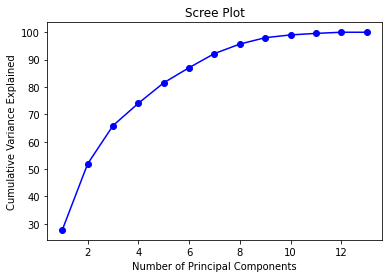

In [11]:
var1 = pd.DataFrame(var1, index=np.arange(1,14))
plt.plot(var1,'-o',color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

From the above plot, we can see that if we choose a 7-component solution, the explained variance would be > 90%. That is to say, 7 orthogonal (uncorrelated) components will be able to keep more than 90% variance of the 13 variables in the original dataset. This would be a good solution. Now, let's do the PCA with 7 components.

The choice of the number of principal components is determined by the analyst. In order to further reduce the number of components, you can choose for example a 2-component solution, which can keep 52% of variance in the original dataset.

### 3.2 A 7-Component Solution

In [12]:
# Select the number of components
pca7 = PCA(n_components=7)
pca7.fit(data_norm)
data_pca7 = pca7.transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca7 = pd.DataFrame(data_pca7)
data_pca7.columns = ["PC"+str(i) for i in range(1,8)]

# Show the head of the DataFrame
data_pca7.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5.529765,-1.805980,-0.613703,-1.131758,-0.875988,0.951639,0.118136
1,0.262997,-1.810757,-3.095078,1.846356,2.470918,0.481391,0.650141
2,4.893527,-2.091762,0.204152,-1.071774,-1.259489,1.902240,-0.652682
3,7.737473,-0.667950,1.172466,-1.404438,-1.373020,0.835324,0.540065
4,-1.146427,-0.215820,-0.736076,-0.361809,1.024117,0.409245,-0.995472
5,-1.038714,-0.253793,-1.496121,0.580666,-0.798031,0.914015,-0.109993
6,-1.370695,0.462749,-1.235197,-0.675207,-0.794173,-0.381632,1.063298
7,-0.848052,-2.153964,0.846246,0.734075,0.456892,-0.781866,-0.739654
8,0.815839,0.549442,0.091892,0.113625,-1.387509,0.569743,-0.526347
9,2.204567,-0.337619,0.702673,-1.009428,-0.556671,0.383773,-0.315713


Run a correlation analysis on the dimension-reducted dataset.

In [13]:
data_pca7.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
PC1,1.000000e+00,1.173724e-16,-2.232402e-16,3.556310e-16,3.558004e-16,-4.921820e-18,-3.751349e-16
PC2,1.173724e-16,1.000000e+00,4.257749e-16,-1.737241e-16,8.094225e-17,-2.399318e-17,4.077841e-16
PC3,-2.232402e-16,4.257749e-16,1.000000e+00,-2.420877e-16,-6.513498e-17,4.223411e-16,4.830952e-17
PC4,3.556310e-16,-1.737241e-16,-2.420877e-16,1.000000e+00,2.736408e-15,5.569543e-16,-3.705221e-16
PC5,3.558004e-16,8.094225e-17,-6.513498e-17,2.736408e-15,1.000000e+00,3.800256e-16,-3.393282e-17
PC6,-4.921820e-18,-2.399318e-17,4.223411e-16,5.569543e-16,3.800256e-16,1.000000e+00,-6.018148e-16
PC7,-3.751349e-16,4.077841e-16,4.830952e-17,-3.705221e-16,-3.393282e-17,-6.018148e-16,1.000000e+00


From the above correlation table, we can find that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components.

PCA applies a linear transformation to transform the data to a new space with fewer dimensions. Let's show the loadings for the 1st principal component and explore how the 1st principal component is calculated from the normalized data.

In [14]:
# Show the loadings for the 1st components
pca7.components_[[0]]

array([[-0.3332577 ,  0.30350996, -0.06117068, -0.21498742,  0.42768885,
        -0.1945408 , -0.26823424,  0.35969408, -0.15038361,  0.11360533,
        -0.09400496, -0.27161796,  0.45456749]])

So, the first component is calculated from the normalized dataset as:

$PC1 = -0.3332577*calories + 0.30350996*protein - 0.06117068*fat + 0.21498742*sodium + 0.42768885*fiber - 0.1945408*carbo - 0.26823424*sugars + 0.35969408*potass - 0.15038361*vitamins + 0.11360533 * shelf -0.09400496*weight -0.27161796*cups + 0.45456749*rating $

We can also manually calculate the 1st principal component score using the following dot product. The result is the same as in the 1st column shown in result line 12. 

In [15]:
# Manually calculate the 1st principal component score, show the first 10 observations.
np.dot(data_norm, pca7.components_[[0]].reshape(13,1))[0:10]

array([[ 5.5297655 ],
       [ 0.26299734],
       [ 4.89352656],
       [ 7.73747312],
       [-1.146427  ],
       [-1.03871386],
       [-1.37069497],
       [-0.84805178],
       [ 0.81583925],
       [ 2.20456653]])

### 3.3 A 2-Component Solution

In [16]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
# data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,5.529765,-1.805980
1,0.262997,-1.810757
2,4.893527,-2.091762
3,7.737473,-0.667950
4,-1.146427,-0.215820


We can show the loading (or called weight) vectors to better understand the mapping from original variables to the components.

In [17]:
pd.DataFrame(pca2.components_.transpose(),
             index=df.loc[:,'calories':'rating'].columns,
             columns=["PC"+str(i) for i in range(1,3)])

,PC1,PC2
calories,-0.333258,-0.354014
protein,0.303510,-0.184091
fat,-0.061171,-0.333425
sodium,-0.214987,-0.128996
fiber,0.427689,-0.236617
carbo,-0.194541,0.155849
sugars,-0.268234,-0.318593
potass,0.359694,-0.349417
vitamins,-0.150384,-0.174544
shelf,0.113605,-0.279502


Since we have two components, we can draw a scatter plot to show the reduced dataset.

Actually, one popular use of PCA is to reduce dimension to two, thus allowing us to plot a multi-dimensional data on a 2D space.

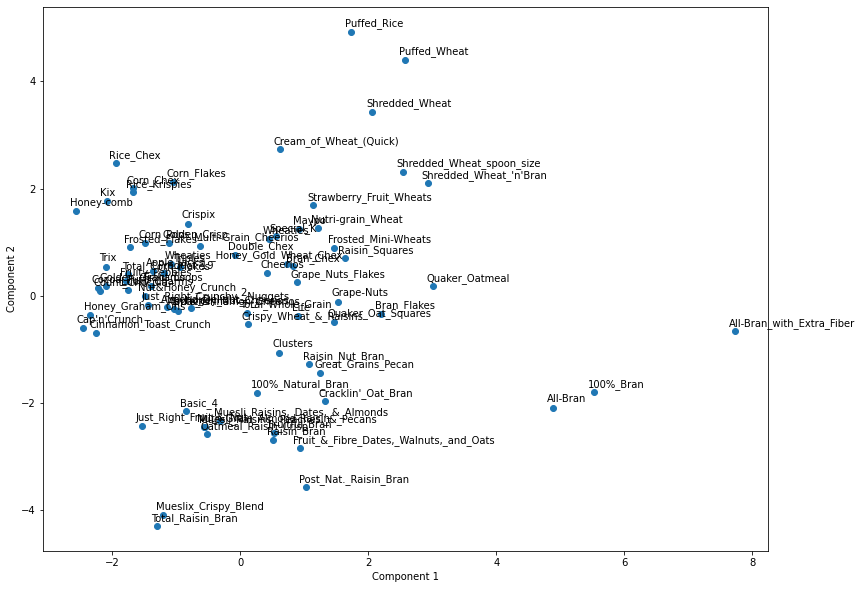

In [18]:
fig, ax = plt.subplots(figsize=(13,10))
ax.scatter(data_pca2['PC1'], data_pca2['PC2'])

ax.annotate(2,(0,0))

for i in np.arange(0,77):
    ax.annotate(df.name[i],(data_pca2.loc[i,'PC1']-0.1,data_pca2.loc[i,'PC2']+0.1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('2D_plot.png', dpi=300,bbox_inches='tight')